<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many Machine Learning problems involve thousands or even millinos of features for each training instance. Not only do all these features make training extremely slow, but they can also make it much harder to find a good solution, as we will see. This problem is often referred to as the *curse of dimensionality*.

Fortunately, in real-world problems, it if often possible to reduce the number of features considerably, turning an intractable problem into a tratable one. For example, consider the MNIST images: the pixels on the image borders are almost always white, so you could completely drop these pixels from the training set without losing much information. Additionally, two neighboring pixels are often highly correlated: if you merge them into a single pixel (e.g. by taking the mean of the two pixel intensities), you will not lose much informatoin.


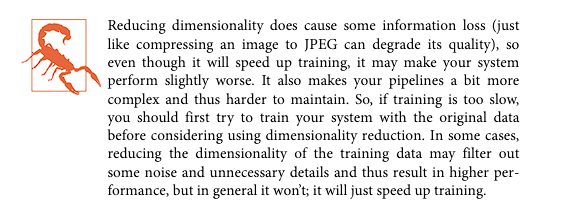

Apart from speeding up training, dimensionality reduction is also extemely useful for data visualization. Reducign the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patters, such as clusters.

In this chapter we will discuss the curse of dimensionality and get a sense of what goes on in high-dimensional space. Then, we will consider the two main approaches to dimensionality reduction, and we wil go through three of the most popular dimensionality reduction techniques: PCA, Kernel PCA, and LLE.

# The Curse of Dimensionality

We are so used to living in three dimensions that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to picture in our minds.

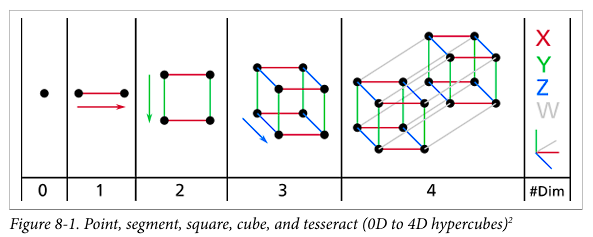

It turns out that many things behave very differently in  high-dimensional space. If you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But if you randomly pick two points in 1,000,000-dimensional hypercube, the average distance, believe it or not , will be 408.25.

This is counterintuitive: how can two points be so far apart when they both lie withing the same hypercube? Well, there's just plenty of space in high dimensions. As a result, high-dimensional datasets are at rish of being very sparse: most training instances are likely to be far away from each other. This means that a new instance will likely be far away from any training instance, making prediction much less reliable than in lower dimensions, since they will be based on much larger extrapolations. In short, the more the dimensions the training set has, the greater the risk of overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances. Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions.

With just 100 features, you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread otu uniformly across all dimensions.

# Main Approaches for Dimensonality Reduction

Before we dive into specific dimensionality reduction algorithms, let's take a look at the two main approaches to reducing the dimensionality: projection and Manifold Learning.

## Projection

In most-real world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high-dimensional space. This sounds very abstract,so let's look at an example. In the figure below you can see a 3D dataset represented by circles

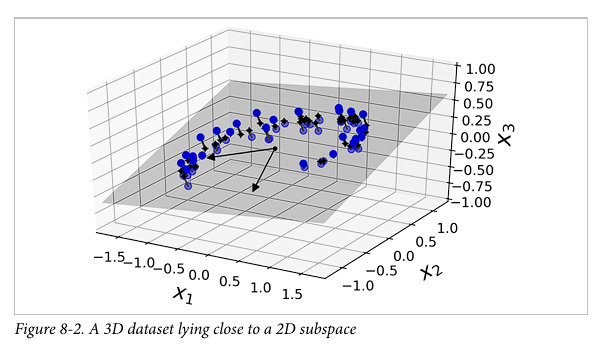

Notice that all training instances lie close to a plane: this a lower-dimensional (2D) subspace of the high-dimensional (3D) space. If we project every training instances perpendicularly onto this subspace, we get the new 2D dataset shown below. We have reduced the dataset's dimensionality from 3D to 2D. Note that axes corresponds to new features z1 and z2

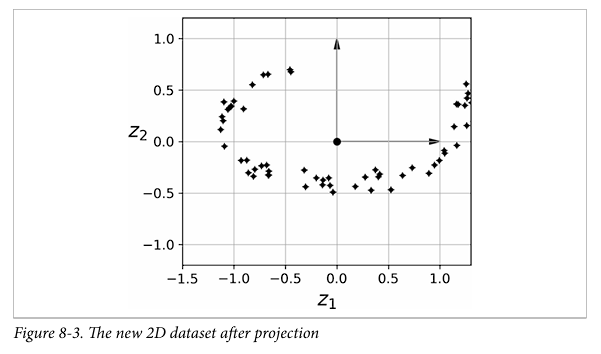

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous *Swiss roll toy* dataset represented below:

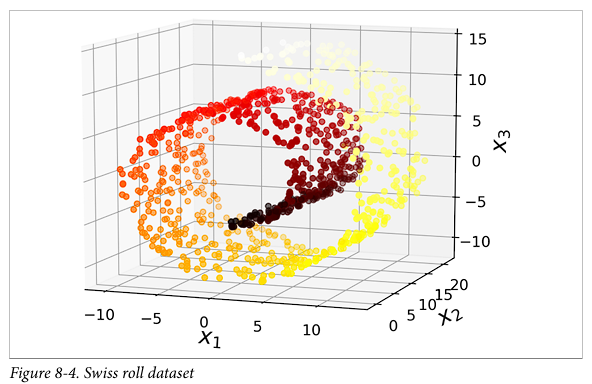

Simply projecting onto a plane, would squash different layers of the Swiss roll together, as shown on the left side of the figure below. What you really want to unroll the Swiss roll to obtain the 2D dataset on the right side of the figure.

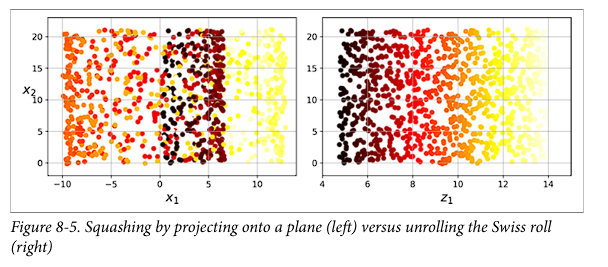

## Manifold Learning

The Swiss roll is an example of a 2D *manifold*. Put simply, a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. In the case of the Swiss roll, d = 2 (manifold dimension) and n = 3 (dimensional space): it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called *Manifold Learning*. It relies on the *manifold assumption*, also called the *manifold hypothesis*, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

Let's consider the MNIST dataset, all handwritten digit images have some similarities. They are made of connected lines, the borders are white and they are more or less centered. If you randomly generate images, only a tiny fraction of them would look like handwritten digits. In other words, the degrees of freedom available to you if you try to create a digit image are lowe than the degree of freedom you would have if you were allowed to generate any image you wanted. These constraints tend to squeeze the dataset into a lower-dimensional manifold.






The maifold assumption is backed by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. For example, in the top row of the figure below, the Swiss roll is split into two classes: in the 3d space (on left), the decision boundary would be fairly compled, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line.

However, this implicit assumptions does not always hold. For example, in the bottom row of the figure, the decision boundary is located at x1=5. This decision boundary looks very simple in the original 3D space ( a vertical plane), but it looks more compled in the unrolled manifold (a collection of four independent line segments).

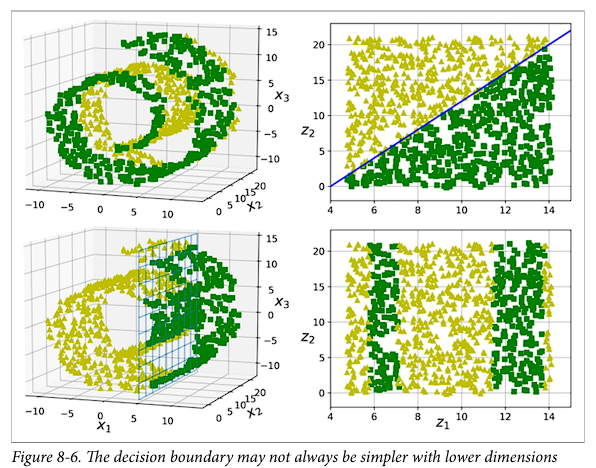

In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

Hopefully you now have a good sense of what the curse of dimensionality is and how dimensionality reduction algorithms can fight it, especially when the manifold assumption holds.

# PCA

*Principal Component Analysis* (PCA) is by far themost popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

## Preserving the Variance

Before we can project the training set onto a lower-dimensional hyperplane, we first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the figure below, along with three different axes (i.e., 1D hyperplanes). On the right is the result of the projection of the dataset onto each of these axes. As we can see, the projection onto the solid line preseves the maximum variance, while the projection onto the dotted line preserves very little variance and the projection onto the dashed line preserved the intermediate amount of variance.

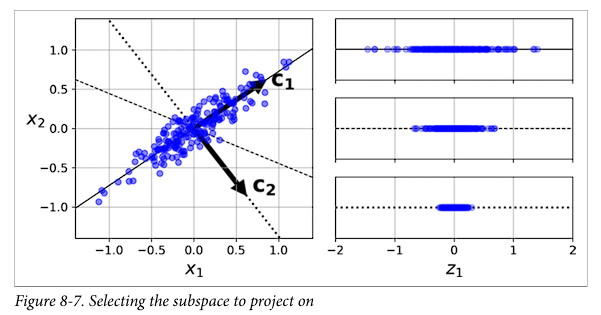

It seems resonable to select the axis that preserves the maximum amount of variance, as it will most likely to lose less information than the other projections. Another way to justify this choice is that it is the axis that minimize the mean squared distance between the original dataset and the projection onto that axis. This is the simple idea behind the **PCA**.

## Principal Components

PCA identifies the axis that have the largest amount of variance in the training set. In the figure above, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. In the 2D example, it's the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to the previous both axes, and fourth and so on - as many axes as the number of dimensions in the dataset.

The ith axis is called the *ith principal component* (PC) of the data.

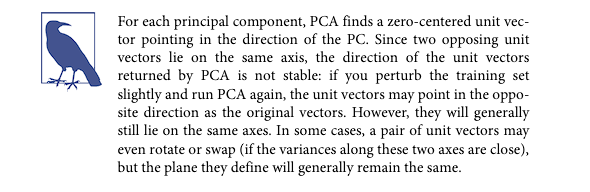

So how can you find the principal components of a training set? Luckily, there is a standard matrix factorization technique called *Singular Value Decomposition* (SVD).

The following Python code uses Numpy's *svd()* function to obtain all the principal components of the training set, then extracts the two unit vectors that define the first two PCs:

```
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]
```

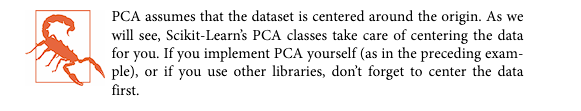

## Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduuce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. Selecting this hyperplane ensures that the projection will preserve as much as variance as possible.

The following Python code projects the training set onto the plane defined by the first two principal components:

```
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
```

There you have it! You now know how to reduce the dimensionality of any adataset down to any number of dimensions, while preserving as much variance as possible

## Using Scikit-Learn

Scikit-Learn's PCA class uses SVD decomposition to implement PCA. The following code applies PCA to reduce the dimesionality of the dataset down to two dimensions:

```
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)
```

After fitting the PCA transformer to the dataset, its **components_** attribute holds the transpose of **W4** (e.g., the unit vector that defines the first principal component is equal to *pca.components_.T[:, 0]*).

Another useful piece of information is the *explained variance ratio* of each principal component, available via the **expalined_variance_ratio_** variable. The ratio indicates the proportion of the dataset's variance that lies along each principal component. For example, let's look at the explained variance ratios of the first two components of the 3D dataset:

```
>>> pca.explained_variance_ratio
array([0.84248607, 0.14631839])
```

This output tells you that 84.2% of the dataset's variance lies along the first PC, and 14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is resonable to assume that the third PC probably carries little information.

## Choosing the Right Number of Dimensions

Instead of randomly choosing the number of dimensions to reduce down to, we can choose the number of dimensions that add up to a significantly large proportion of the variance (e.g., 95%). If we are reducing the dimensionality for visualization, then we will reduce the dimensionality to 2 or 3.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensionns required to preserve 95% of the training set's variance:

```
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.armax(cumsum >= 0.95) + 1
```

We could then set **n_components = d** and run PCA again. But there is a much better approach, instead of specifying the number of principal components we want to preserve, we can set **n_components** to be a float between 0 and 1, indicating the ratio of variance we wish to preserve:

```
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
```

Another option is to plot the explained variance as function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case, we can see that reducing the dimensionality down to about 100 dimensions wouldn't lose too much of expalined variance.

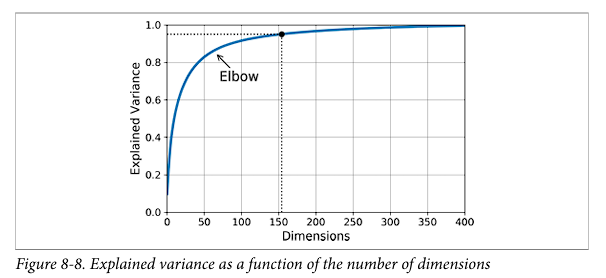

## PCA for compression

After dimensionality reduction, the training set takes up much less space. As an example, if apply PCA to MNIST dataset while preserving 95% of its variance. We will find that each instance will have just over 150 features, instead of the original 784 features. So, while most of the variance is preserved, the dataset is now less than 20% of its original size! This is reasonable compression ratio, and you can see how this size reduction can speed up a classification algorthm ( such as an SVM classifier) tremendously.

It's also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. This won't give you back the original data, since the projection lost a bit of information (5% of the variance was dropped), but it will likely be close to the original data. The mean squared distance between the original data and the reconstructed data(compressed and then decompressed) is called the *reconstruction error*.

The following code compresses the MNIST dataset down to 154 dimension , then decompresses it back to 784 dimensions using *inverse_transform()* method:

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version= 1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist.data, mnist.target

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [5]:
print("X_reduced.shape: ", X_reduced.shape)
print("X_recovered.shape: ", X_recovered.shape)

X_reduced.shape:  (70000, 154)
X_recovered.shape:  (70000, 784)


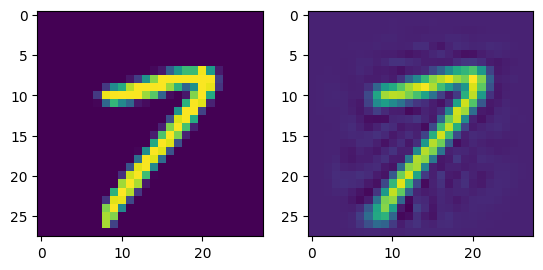

In [6]:
# Let's plot the image of the original dataset.
import matplotlib.pyplot as plt

plt.subplot(1,2, 1)
plt.imshow(X.iloc[3507].values.reshape(28,28))
plt.subplot(1,2, 2)
plt.imshow(X_recovered[3507].reshape(28,28))
plt.show()

You can see that there is slight image quality loss, but the digit is still mostly intact.

## Randomized PCA

If you set the **svd_solver** hyperparameter to "randomized", Scikit-learn uses a stochastic algorithm called *Randomized PCA* that quickly finds an approximation of the first d principal components. Its computational complexity is *O(m x d^2) + O(d^3)*, instead of *O(m x n^2) + O(n^3)* for the full SVD approach, so it is dramatically faster than full SVD when d is much smaller than n:

In [7]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X)

By default, **svd_solver** is set to **"auto"**: Scikit-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m or n, or else it uses the full SVD approach. If you want to force Scikit-Learn to use full SVD, you can set **svd_solver** hyperparameter to "full".

## Incremental PCA

One problem with the preceeding implementations of PCA is that they require the whole training set to fit in the memory in order for the algorithm to run. Fortunately, *IncrementalPCA* (IPCA) allows us to split training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. This is useful for large training sets and for applying PCA online.

The following code splits the MNIST dataset into 100 mini-batches (using Numpy's **array_split()** function) and feeds them to Scikit-Learns **IncrementalPCA** class to reduce the dimensionality of the MNIST dataset down to 154 dimensions. Note that you must call the **partial_fit()** method with mini-batch rather than the **fit()** method with the whole training set:

In [8]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

mini_batch = 100
ipca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X, mini_batch):
  ipca.partial_fit(X_batch)

X_reduced = ipca.transform(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Alternatively, we can use Numpy's **memmap** class, which allows us to manipulate the large array stored in a binary file on disk as if it were entirely in memory: the class only loads the data it needs in the memory, when it needs it. Since the **IncrementalPCA** class uses only a small part of the array at a given point of time, the memory usage remains under control. This makes it possible to call the usual fit() method, as we can see in the following code:

```
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m,n))

batch_size = m // mini_batch
ipca = IncrementalPCA(n_components = 154, batch_size = mini_batch)
ipca = fit(X_mm)
```

## Kernel PCA

Just like the SVM same kernel trick can be applied to PCA, making it possible to perform complex nonlinear projection for dimensionality reduction. This is called **Kernel PCA (KPCA)**. It is often good at preserving clusters of instances after projection, or sometimes even unrolling the datsets that lie close to a twisted manifold.

The following code uses Scikit-Learn's **KernelPCA** class to perform **KPCA** with an RBF kernel:

In [9]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples = 1500, random_state=42)

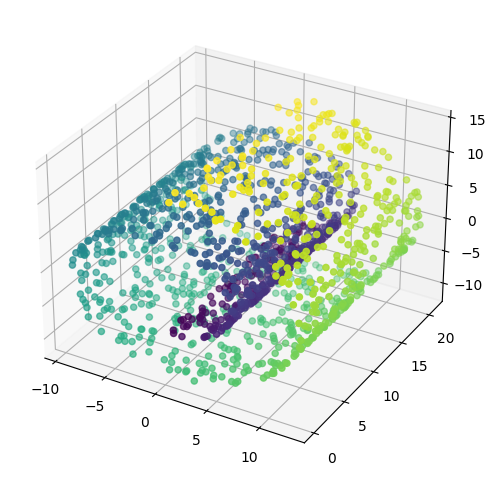

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(X[:,0], X[:,1], X[:,2], c = t)
plt.show()

In [11]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = "rbf", gamma=0.04)
X_reduced = kpca.fit_transform(X)

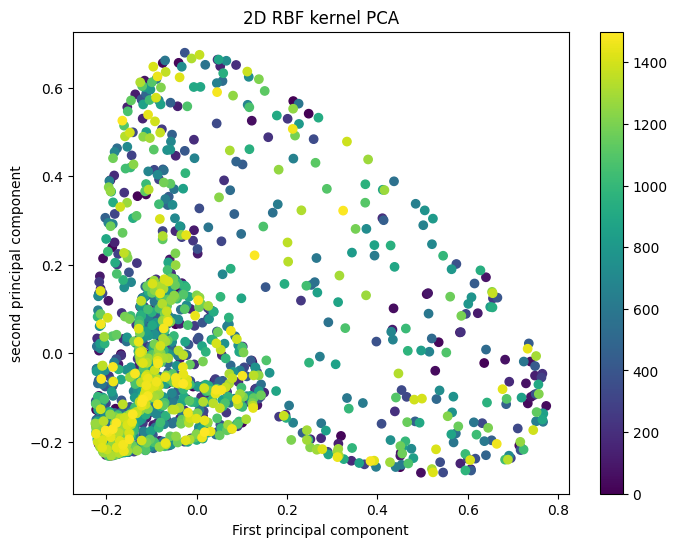

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=range(len(X_reduced)), cmap="viridis")
plt.colorbar()

plt.xlabel('First principal component')
plt.ylabel('second principal component')
plt.title("2D RBF kernel PCA")
plt.show()

The figure below shows the Swiss roll, reduced to two dimensions using a linear kernel (equivalent to simply using PCA class), an RBF kernel, and a sigmoid kernel.

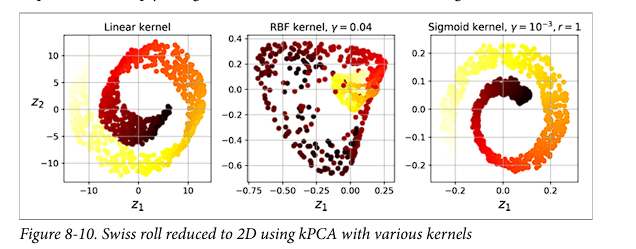

## Selecting a kernel and Tuning Hyperparameters

A kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter rvalues. That said, dimensionality reduction is often a preparation step for a supervised learning task, so you use grid search to select the kernel and hyperparameters that lead to best peformance on that task.

The folloiwng code creates a two step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [14]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components = 2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)

In [15]:
threshold = np.mean(t)

In [16]:
t = (t > threshold).astype(int)
grid_search.fit(X,t)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [17]:
# The best kernel and hyperparameters are then available through the
# best_params_ variable:

print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


Another approach, this time entirely unsupervised, is to select the kernel and hyper
parameters that yield the lowest reconstruction error.

Scikit-Learn implementation of the above is as follows

In [18]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.043, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [19]:
# You can compute the reconstruction pre-image error as below
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

33.31341407376939

Make sure to set the parameter **fit_inverse_transform=True** in the KernelPCA for the above.

Now you can use grid Search with cross-validation to find the kernel and hyperparameters that minimize this error.

# LLE

*Locally Linear Embedding (LLE)* is another powerful *nonlineaer dimensionality reduction* (NLDR) technique. It is a Manifold Learning technique that does not rely on prjections, like the previous algorithms do. In a nutshell, LLE works by first measureing ow each training instance linearly relates to it closest neighbors, and then looking for a low-dimensional representation of the training set wher these local relationships are best preserved. This approach makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

The following code uses Scikit-Learn's **LocallyLinearEbedding** class to unroll the swiss roll:

In [20]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state = 42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

The resulting 2D dataset is shown in the figure below. As you can see, the Swiss roll is completely unrolled, and the distance between instances are locally well preserved. However, distances are not preserved on a larger scale: the left part of the unrolled swiss roll is stretched, while the right part is squeezed. Nevertheless, LLE did a pretty good job at modelign the manifold.

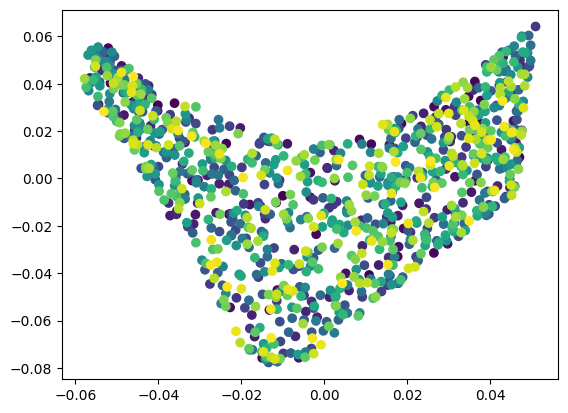

In [21]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = range(len(X_reduced)))
plt.show()

 Scikit-Learn’s LLE implementation has the following computational complexity:
 O(m log(m)n log(k)) for finding the k nearest neighbors, O(mnk3) for optimizing the
 weights, and O(dm2) for constructing the low-dimensional representations. Unfortu
nately, the m2 in the last term makes this algorithm scale poorly to very large datasets

# Other Dimensionality Reduction Techniques

There are many other dimensionality reduction techniques,several of which are available in Scikit-Learn. Here are some of the most popular ones:

**Random Projections**

As its name suggests, projects the data to a lower-dimensional space using a ran
dom linear projection. This may sound crazy, but it turns out that such a random
 projection is actually very likely to preserve distances well, as was demonstrated
 mathematically by William B. Johnson and Joram Lindenstrauss in a famous
 lemma. The quality of the dimensionality reduction depends on the number of
 instances and the target dimensionality, but surprisingly not on the initial dimen
sionality. Check out the documentation for the sklearn.random_projection
 package for more details.

**Multidimensional Scaling (MDS)**

Reduces dimensionality while trying to preserve the distance between the instances.

**Isomap**

Creates a graph by connecting eachinstance to its nearest neighbors, then reduces dimensionality whily trying to preserve the *geodesic distances* between instances.
( The geodesic distance between two nodes in a graph is the number of nodes on the shortest path between
 these nodes.)

 **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

 Reduces dimensionality while trying to keep similar instances close and dissimiliar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high dimensional space

 **Linear Discriminant Analysis (LDA)**

 It's a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit of this approach is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.

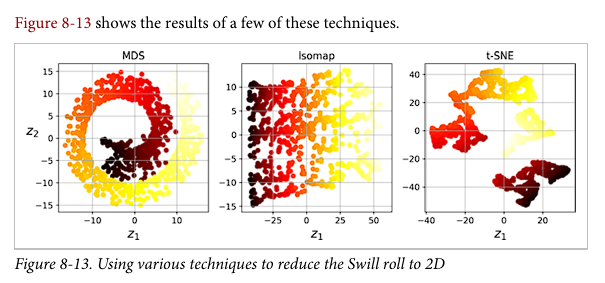